In [41]:
import os
os.getcwd()


'c:\\Users\\vaibhavi mane\\Desktop\\my_wine_project\\analysis.ipynb'

In [42]:
import os

print(os.getcwd())
print(os.listdir())


c:\Users\vaibhavi mane\Desktop\my_wine_project\analysis.ipynb
['analysis.ipynb', 'winequality-red.csv', 'winequality-white.csv', 'winequality.names']


In [43]:
import os
os.listdir()


['analysis.ipynb',
 'winequality-red.csv',
 'winequality-white.csv',
 'winequality.names']

In [44]:
import pandas as pd

df_red = pd.read_csv("winequality-red.csv", sep=";")
df_white = pd.read_csv("winequality-white.csv", sep=";")

df_red.head(), df_white.head()


(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  
 0      9.4        5  
 1      9.8        5  
 2 

In [45]:
df_red.info()
df_red.describe()
df_red.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [46]:
df_red['type'] = 'red'
df_white['type'] = 'white'

df = pd.concat([df_red, df_white], ignore_index=True)
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt



In [48]:
df_red.head()
df_white.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


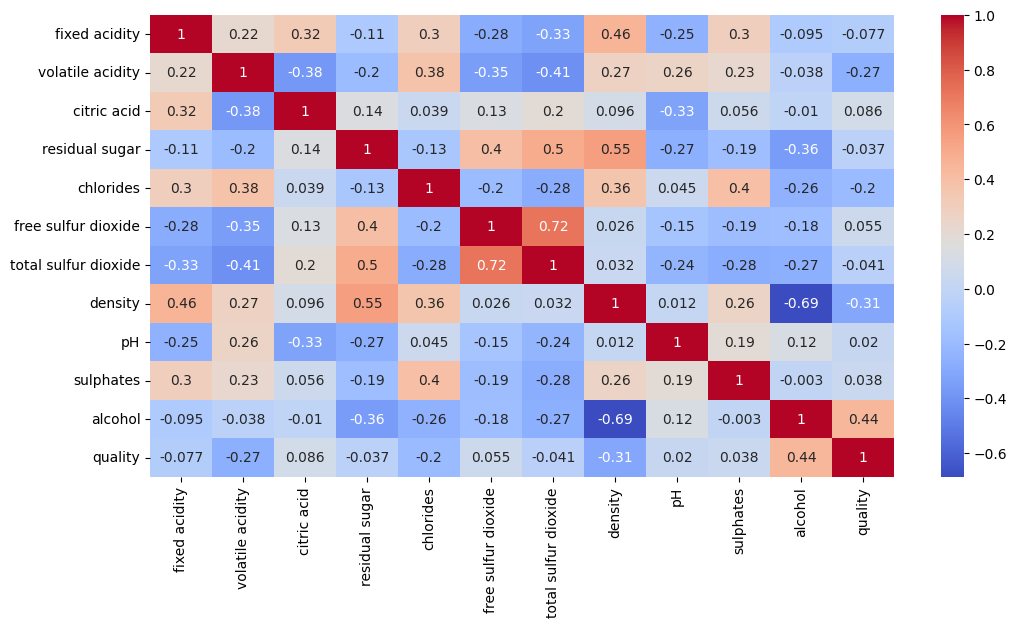

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(df.drop("type", axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()



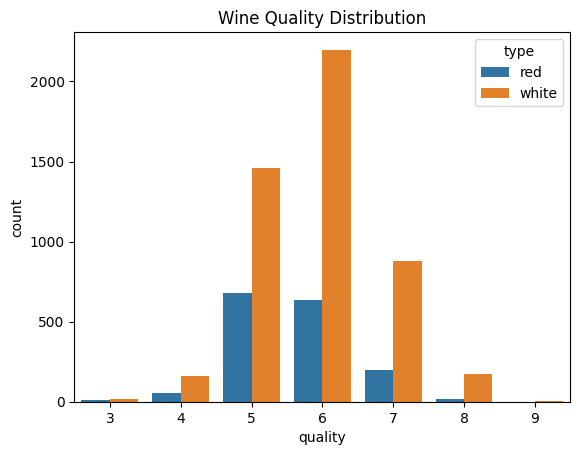

In [50]:
sns.countplot(data=df, x="quality", hue="type")
plt.title("Wine Quality Distribution")
plt.show()


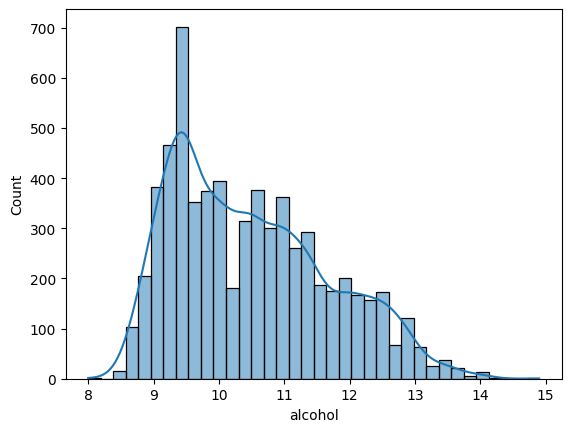

In [51]:
sns.histplot(df['alcohol'], kde=True)
plt.show()


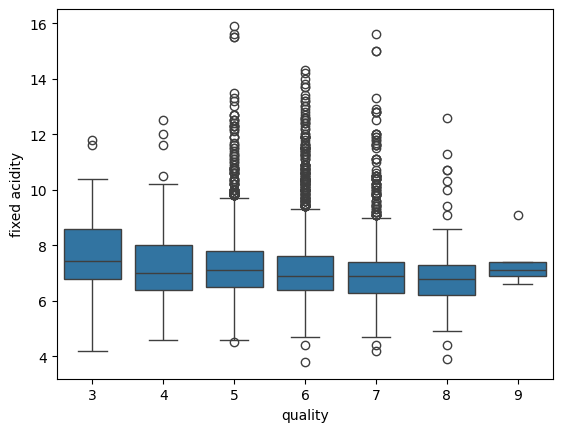

In [52]:
sns.boxplot(data=df, x='quality', y='fixed acidity')
plt.show()


In [53]:
from sklearn.model_selection import train_test_split

X = df.drop(["quality", "type"], axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, pred_rf)
accuracy_rf


0.6607692307692308

In [55]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, pred_svc)
accuracy_svc


0.45076923076923076

In [56]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)

pred_sgd = sgd.predict(X_test)
accuracy_sgd = accuracy_score(y_test, pred_sgd)
accuracy_sgd


0.06153846153846154